In [48]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from matplotlib import rcParams
from matplotlib.cm import rainbow

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [59]:
df.shape

(1025, 14)

In [60]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

# Visualization all columns data in Histogram

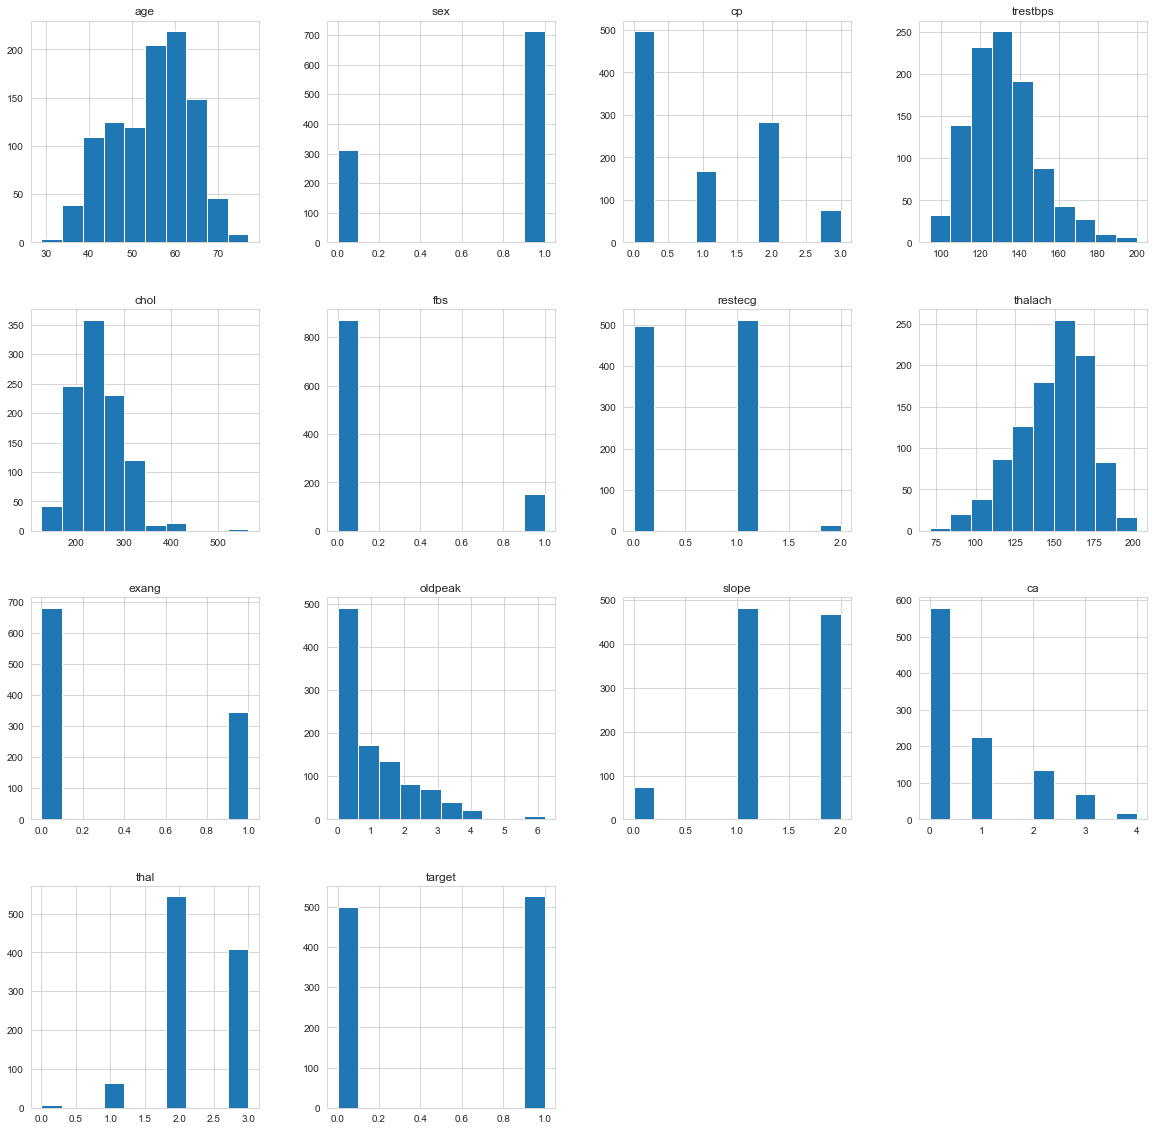

In [63]:
df.hist(figsize=(20,20))
plt.show()


# Correlation Matrix Plot

The lighter color represent the similarity in Column Data and the darker color represent the dissimilarity in Column data

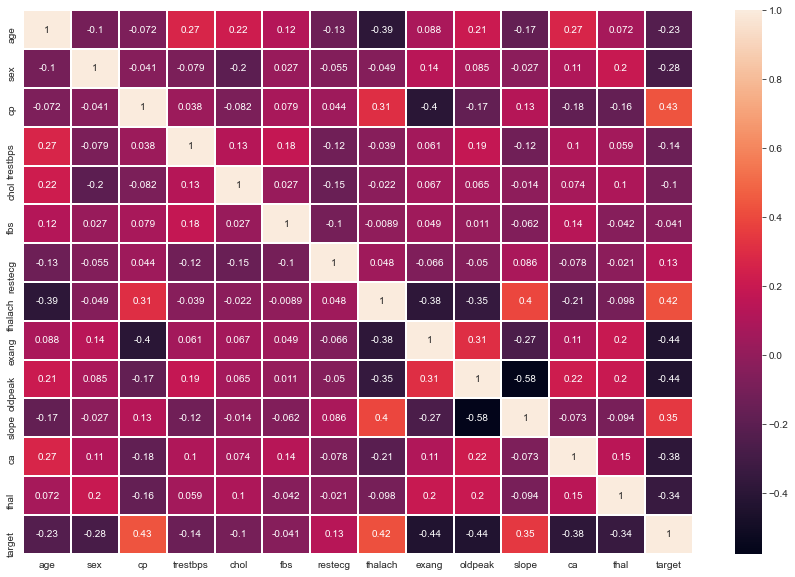

In [70]:
plt.figure(figsize=(15, 10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, linewidth =1)
plt.show()

# Checking Heart Disease People and Non Heart Disease People Visualizing them

In [53]:
df['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

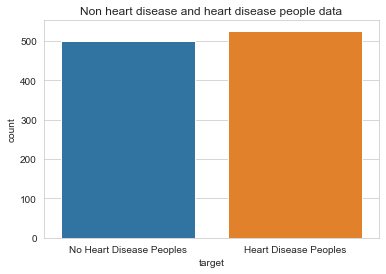

In [27]:
vz = sns.countplot(x='target', data=df )
vz.set(xticklabels = (['No Heart Disease Peoples', 'Heart Disease Peoples']))
plt.title('Non heart disease and heart disease people data')
plt.show()

# Checking Male and Female data and Visualizing them

In [67]:
df['sex'].value_counts()


1    713
0    312
Name: sex, dtype: int64

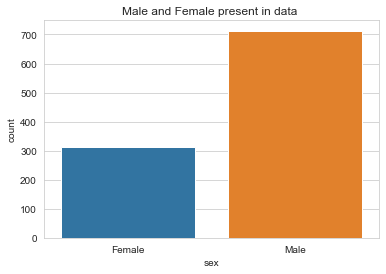

In [26]:
vz2 = sns.countplot(x='sex', data=df )
vz2.set(xticklabels = (['Female', 'Male']))
plt.title('Male and Female present in data ')
plt.show()


# Visualizing Male and Female having Heart Diseases

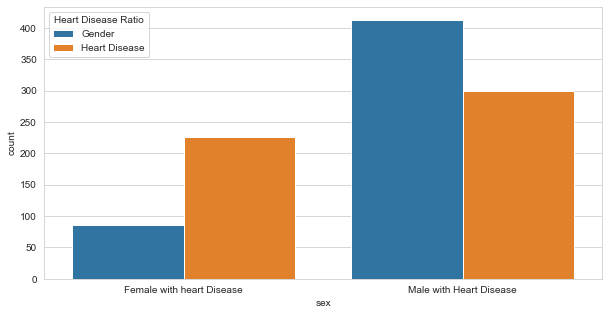

In [88]:
plt.figure(figsize=(10, 5))
vz2 = sns.countplot(x=df['sex'], hue=df['target'])
sns.set_style("whitegrid")
vz2.set(xticklabels = (['Female with heart Disease', 'Male with Heart Disease']))
plt.legend(labels=['Gender','Heart Disease'], title = 'Heart Disease Ratio', loc ="upper left")

# Visualizing Age of heart disease people and non heart disease

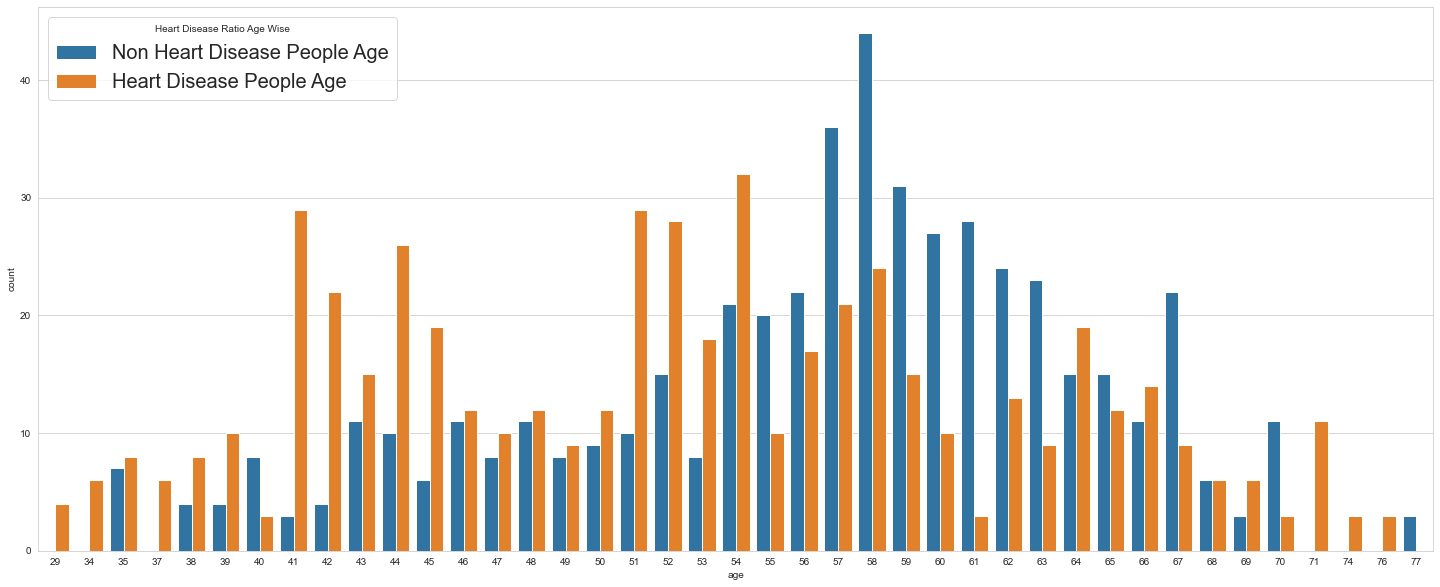

In [44]:
plt.figure(figsize=(25,10))
sns.countplot(x='age', hue='target', data=df)
plt.legend(labels=['Non Heart Disease People Age','Heart Disease People Age '], loc ="upper left", title='Heart Disease Ratio Age Wise',fontsize='20')
plt.show()

# Visualizing Chest pain Gender and level wise 

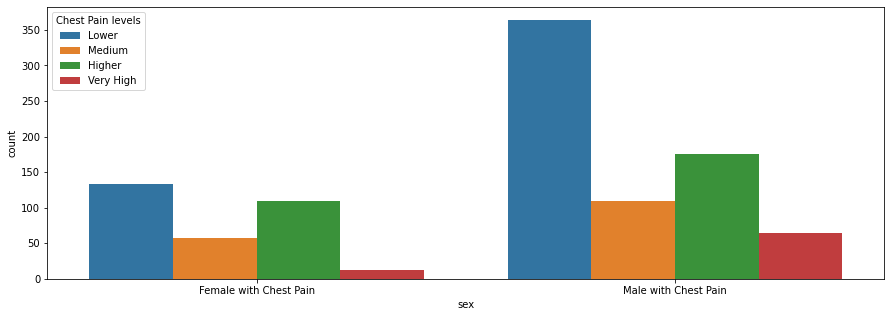

In [12]:
plt.figure(figsize=(15,5))
vz=sns.countplot(x="sex",hue="cp", data=df)
vz.set(xticklabels = (['Female with Chest Pain', 'Male with Chest Pain']))
plt.legend(labels=['Lower', 'Medium','Higher', 'Very High'], loc ="upper left",title='Chest Pain levels', fontsize='10')

# Visualizing chest pain causing heart disease to Peoples

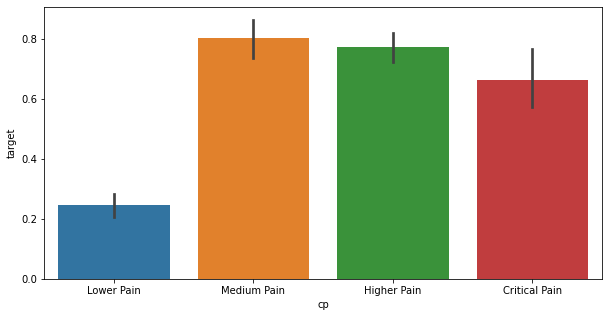

In [54]:
plt.figure(figsize=(10,5))
vz = sns.barplot(x=df["cp"], y=df["target"], data=df)
vz.set(xticklabels = (['Lower Pain', 'Medium Pain', 'Higher Pain', 'Critical Pain']))
plt.show()


The visualization shows that Medium Chest pain having high rate of heart disease in Peoples

# Visualization slope causing heart disease to People

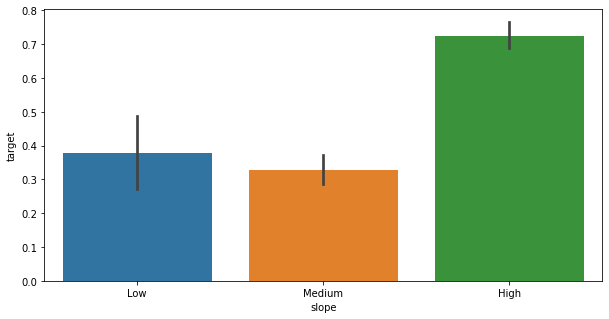

In [15]:
plt.figure(figsize=(10,5))
vz=sns.barplot(x=df["slope"],y=df["target"], data=df)
vz.set(xticklabels = (['Low', 'Medium', 'High']))
plt.show()

The bar plot shows that slope High causes more heart disease to Peoples than slope low and Medium Peoples 

# Visualizing which level of restecg causing heart Disease to peoples 

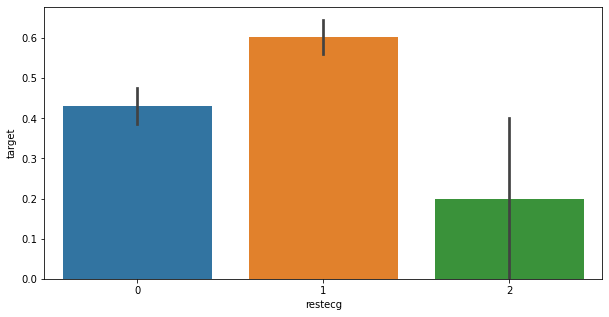

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["restecg"], y=df["target"], data=df)
plt.show()

The people with restecg 1 and 0 are much more likely to have a heart disease than restecg 2

# Visualizing Ca levels peoples are having heart Disease 

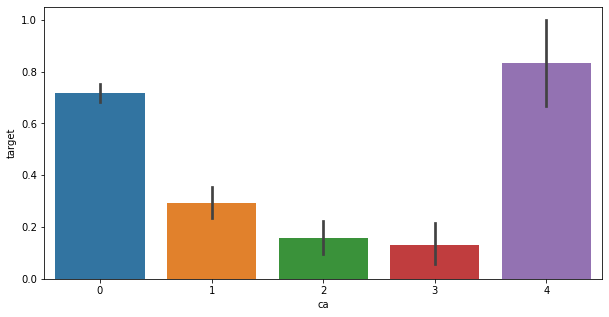

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["ca"], y=df["target"], data=df)
plt.show()

With the help of this visualization we can the peoples at no 4 ca have higher heart disease rate

# Visualizing Fasting Blood Sugar Level (FBS)

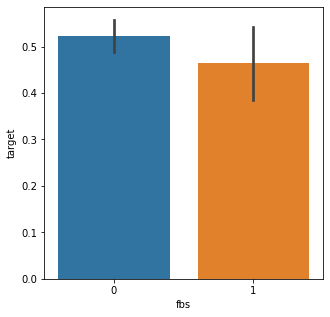

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x=df["fbs"], y=df["target"], data=df)
plt.show()

Looks like fbs 0 are having heart disease more than fbs 1

# Visualizing thal levels Peoples are having heart disease

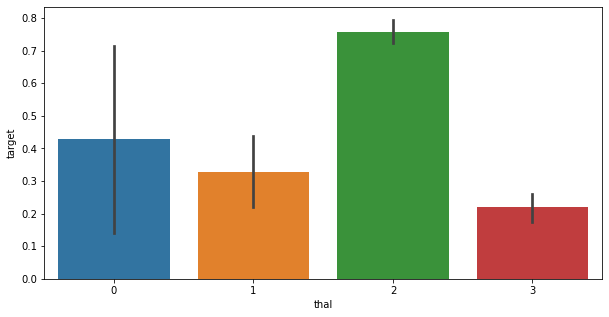

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["thal"], y=df["target"], data=df)
plt.show()

The visualization shows that the peoples with thal 2 are having higer rate of heart Disease

# Visualizing exang to check Peoples having high heart disease

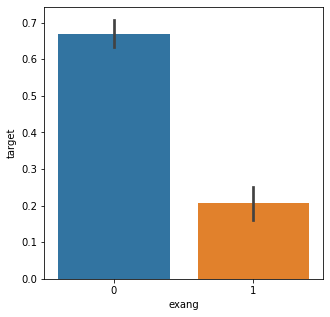

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(x=df["exang"], y=df["target"], data=df)
plt.show()

The chart shows that 0 exang are having higher heart disease

# Visualizing oldpeak data to cheack heart disease

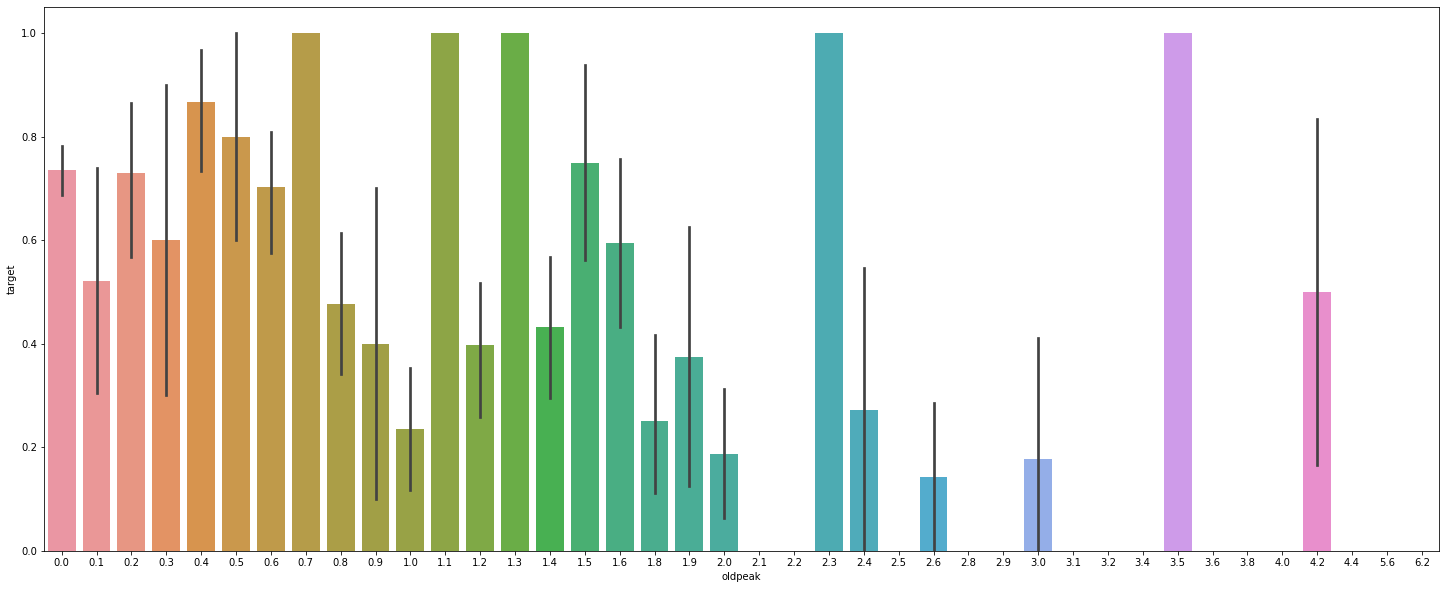

In [31]:
plt.figure(figsize=(25,10))
sns.barplot(x=df["oldpeak"], y=df["target"], data=df)
plt.show()

# Visualizing trestbps data to check Heart Disease

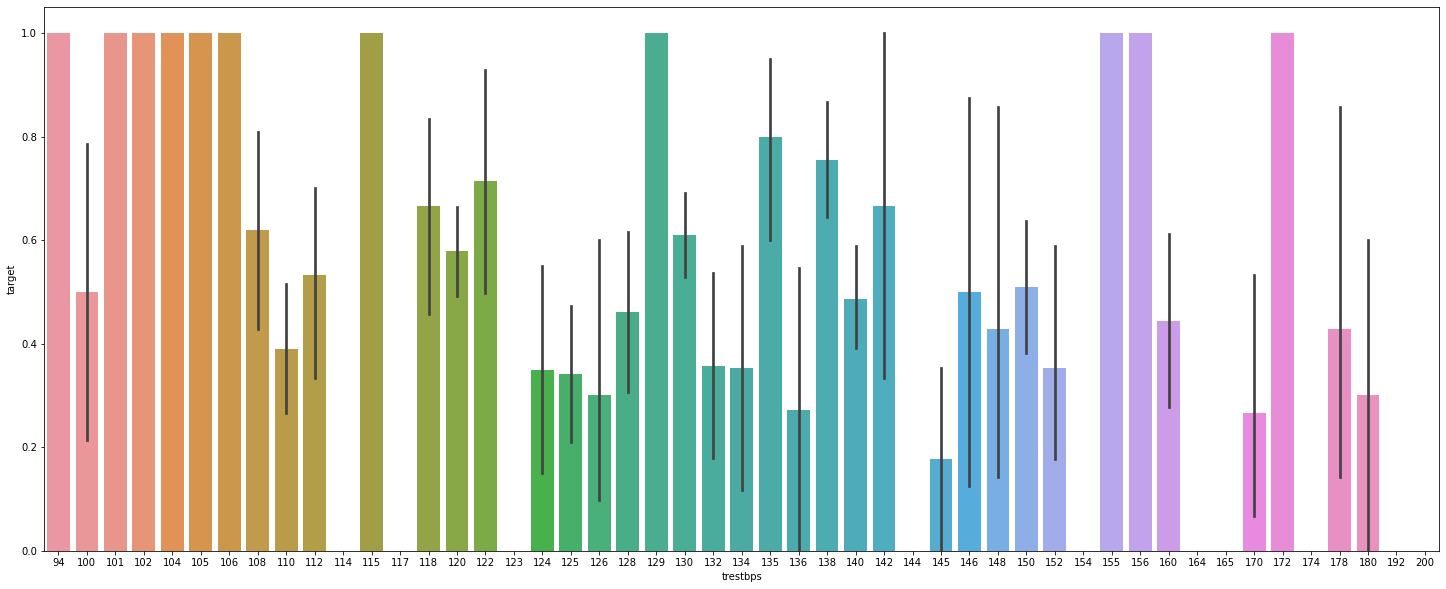

In [6]:
plt.figure(figsize=(25,10))
sns.barplot(x=df["trestbps"], y=df["target"], data=df)
plt.show()

# Training Model using Machine learning Algotithms

# Dropping target column in dataframe

In [9]:
X = df.drop('target', axis=1)
y = df['target']

In [10]:
print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


# Spliting X and y values that its training is 70% and testing is 30% 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

here random_state are used to setup seed for the random generator 42 used because it is default scikit learn train test split every time is used same otherwise the result will be different

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717,)
(308,)


# Random Forest Machine learning algorithm to check accuracy

Accuracy of Random Forest model is: 98.05194805194806


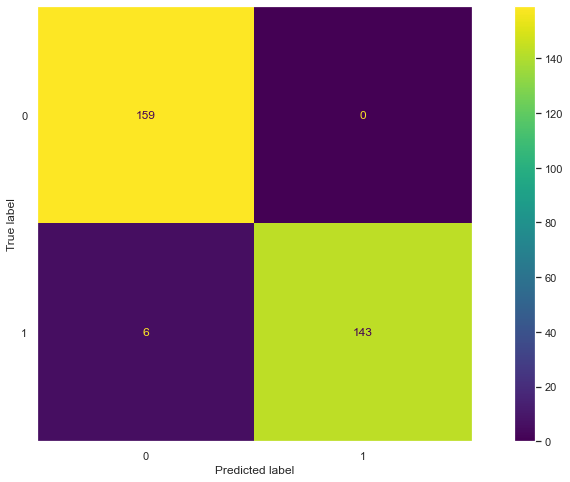

In [71]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
RF_acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Random Forest model is: {RF_acc}")
disp = plot_confusion_matrix(rf, X_test, y_test)
plt.grid(False)


# Decision Tree Machine learning algorithm to check accuracy

Accuracy of Decision Tree model is: 97.07792207792207


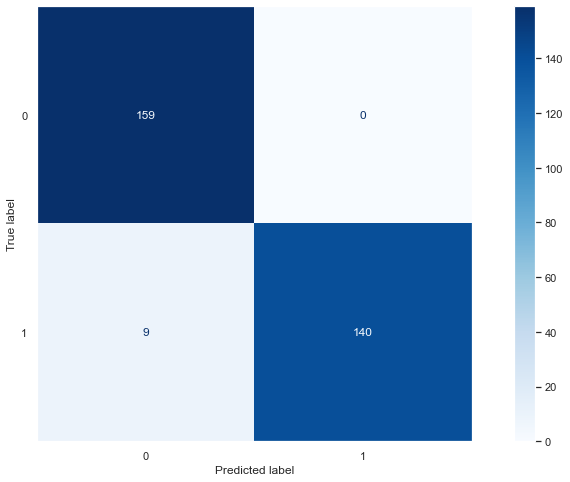

In [72]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
DT_acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Decision Tree model is: {DT_acc}")
disp = plot_confusion_matrix(dt, X_test, y_test, cmap='Blues')
plt.grid(False)

# Logistic Regression Machine learning algorithm to check accuracy

C:\Users\Mairaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression model is: 81.81818181818183


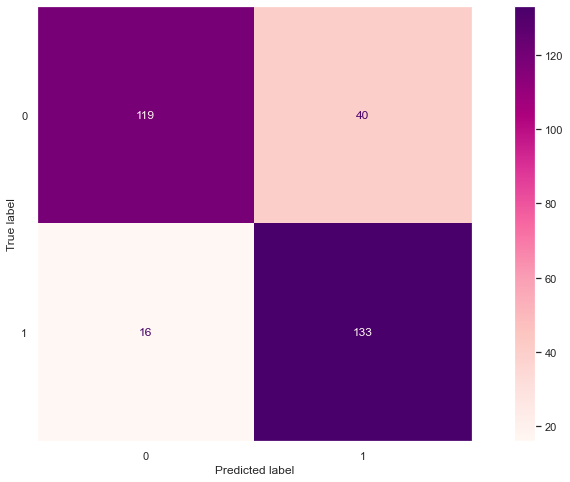

In [73]:
lr2 = LogisticRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)
LR_acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Logistic Regression model is: {LR_acc}")
disp = plot_confusion_matrix(lr2, X_test, y_test, cmap='RdPu')
plt.grid(False)

# Naive Bayes Machine learning algorithm to check accuracy

Accuracy of Naive Bayes model is: 81.4935064935065


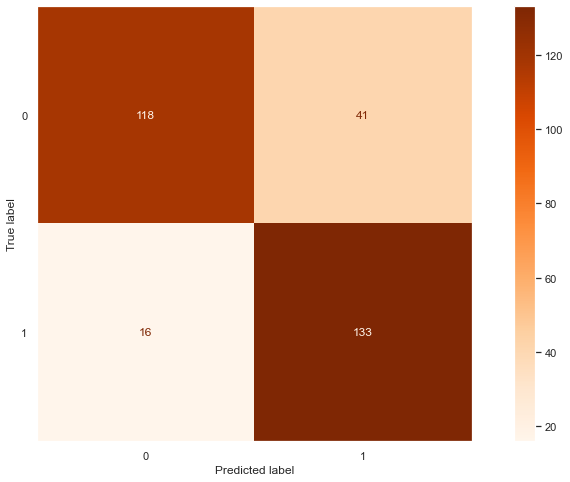

In [76]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
NB_acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Naive Bayes model is: {NB_acc}")
disp = plot_confusion_matrix(gnb, X_test, y_test, cmap='Oranges')
plt.grid(False)

# KNN Machine learning algoithm to check accuracy

Accuracy of KNN model is: 72.07792207792207


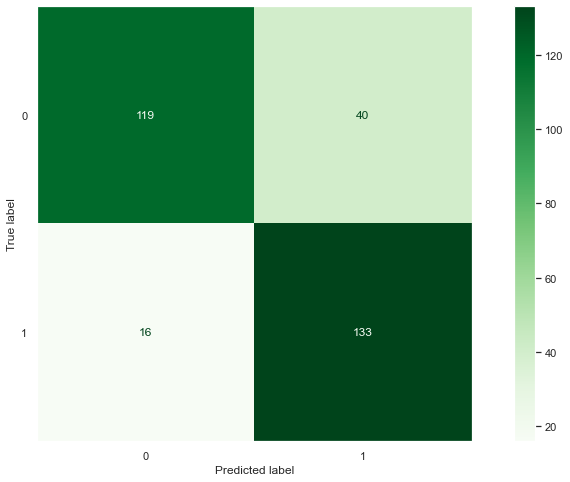

In [77]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
KNN_acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of KNN model is: {KNN_acc}")
disp = plot_confusion_matrix(lr2, X_test, y_test, cmap='Greens')
plt.grid(False)

n_neighbour is a tunning parameter of model you can use it from 1 to 25

# Artificial Neural Network algorithm to check accuracy

In [85]:
# Initializing Artificial Neural Network
model = Sequential()
# Creating hidden layer or Input layer where neurons = 6 and activation is always same like 'relu'= rectified linear unit
model.add(Dense(6,activation='relu',input_dim=13))
# Creating hidden layer or output layer allocating only 1 neuron for output results 
model.add(Dense(1,activation='sigmoid'))
# After creating layers now compileing the model 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# train our ann with dataset for 350 times
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 5.4461 - accuracy: 0.6053
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 4.9053 - accuracy: 0.6109
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 4.6897 - accuracy: 0.6276
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 4.5547 - accuracy: 0.6179
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 4.2329 - accuracy: 0.6318
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 4.0168 - accuracy: 0.6402
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 3.8260 - accuracy: 0.6374
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 3.6460 - accuracy: 0.6346
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 3.4276 - accuracy: 0.6444
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 3.2525 - accuracy: 0.6388
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8257
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8452
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8494
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8396
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8340
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8466
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8368
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8480
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8396
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3858 - accuracy: 0.8368
Epoch 93/100


In [86]:
# checking loss and accuracy values
loss, acc_ann = model.evaluate(X_test, y_test)
acc_ann = acc_ann*100
print("Training Accuracy = "+str(acc_ann))
print("Loss Accuracy = "+str(loss*100))

10/10 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7955
Training Accuracy = 79.54545617103577
Loss Accuracy = 43.935468792915344


In [87]:
accuracy = [RF_acc, DT_acc, LR_acc, NB_acc, KNN_acc, acc_ann]
ML_algorithms = ["Random Forest", "Decision Tree", "Logistic Regression", "Naive Bayes","K-Neighbour","Artificial Neural Network"]    

for i in range(len(ML_algorithms)):
    print("The accuracy achieved using "+ML_algorithms[i]+" is: "+str(accuracy[i]))

The accuracy achieved using Random Forest is: 98.05194805194806
The accuracy achieved using Decision Tree is: 97.07792207792207
The accuracy achieved using Logistic Regression is: 81.81818181818183
The accuracy achieved using Naive Bayes is: 81.4935064935065
The accuracy achieved using K-Neighbour is: 72.07792207792207
The accuracy achieved using Artificial Neural Network is: 79.54545617103577


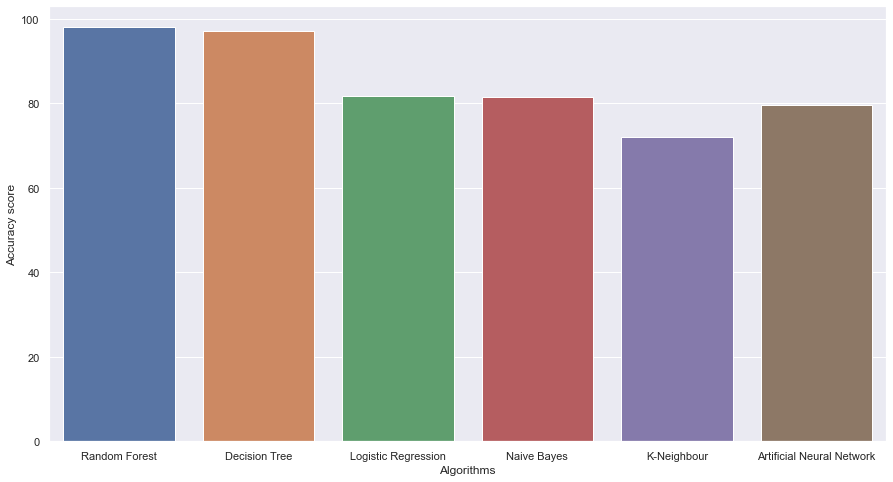

In [88]:
plt.figure(figsize=(15,8))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=ML_algorithms, y=accuracy)
plt.show()


The highest accuracy Model is Random Forest the accuracy is achieved 98% by training this model